 # Predicting Breast Cancer
 - [Data Cleaning](#Data-Cleaning)
 - [EDA](#EDA)

Goal: To determine how predictible breast cancer is. Can we predict if a tumor is dangerous (M as it grows faster and can effect other areas) and can we predict if someone is likely to die.

# Data Cleaning

### Wisconsin Breast Cancer Data

In [1]:
# Import necessary data libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Import graphing packages
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the first dataset https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download
df_wis = pd.read_csv("data.csv")

# Unsure why unnamed is poping up for me, but deleting
# Comment below line if error
df_wis = df_wis.drop(['Unnamed: 32'],axis=1)

# View the data
df_wis.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Describe the wis data
df_wis.describe()

# Notice varying values, so will probably need to scale data

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
# View wis data info
df_wis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Inspect the dataset for missing values
print(df_wis.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### BRCA Cancer Data

In [6]:
# Now its time to investigae the other dataset for patients with cancer
# https://www.kaggle.com/datasets/amandam1/breastcancerdataset/data
df_brca = pd.read_csv("BRCA.csv")

df_brca.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [7]:
# Summary stats of data
df_brca.describe()

# Notice age is higher than other numbers, also have a lot of categorical variables we will have to decode

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [8]:
# We only care about patients with a patient status 
df_brca = df_brca[df_brca['Patient_Status'].notna()]

In [9]:
# Look at nulls and dtypes
df_brca.info()

# After dropping nans, 4 remain that are null date of last visit
# Normally would want to keep to see pattern, but assuming a pattern exist with 4 patients is dangerous (overfit)
# So will drop those columns as well

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          321 non-null    object 
 1   Age                 321 non-null    float64
 2   Gender              321 non-null    object 
 3   Protein1            321 non-null    float64
 4   Protein2            321 non-null    float64
 5   Protein3            321 non-null    float64
 6   Protein4            321 non-null    float64
 7   Tumour_Stage        321 non-null    object 
 8   Histology           321 non-null    object 
 9   ER status           321 non-null    object 
 10  PR status           321 non-null    object 
 11  HER2 status         321 non-null    object 
 12  Surgery_type        321 non-null    object 
 13  Date_of_Surgery     321 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [10]:
# Drop all null values in date of last visit to have complete data set
df_brca = df_brca[df_brca['Date_of_Last_Visit'].notna()]

In [11]:
# Convert date variables into actual dates
df_brca['Date_of_Last_Visit'] = pd.to_datetime(df_brca['Date_of_Last_Visit'])
df_brca['Date_of_Surgery'] =  pd.to_datetime(df_brca['Date_of_Surgery'])

df_brca.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2018-06-09,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-07-12,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,2019-06-27,Dead


In [12]:
# Get hours difference between dates
df_brca['Hours_Visit_Surgery'] = (df_brca['Date_of_Last_Visit']- df_brca['Date_of_Surgery']).dt.total_seconds()/3600

# Drop 2 time cols
df_brca = df_brca.drop(['Date_of_Last_Visit','Date_of_Surgery'],axis=1)

In [13]:
# ER and PR status is always positive, so not needed
df_brca = df_brca.drop(['ER status','PR status'],axis=1)

In [14]:
# Categorical variables for BRCA data
brca_cat = ['Gender','Tumour_Stage','Histology','HER2 status', 'Surgery_type', 'Patient_Status']

### Data Transformations

In [15]:
# 1. Encode the 'diagnosis' column
# Assuming 'Diagnosis' is the only categorical variable and it's binary (M = malignant, B = benign) for wis data
le = LabelEncoder()
df_wis['diagnosis'] = le.fit_transform(df_wis['diagnosis'])

# Converting all cat columns for brca to be encoded
df_brca[brca_cat] = df_brca[brca_cat].apply(le.fit_transform)

In [16]:
# 2. Standardize the numeric features (excluding 'id' and 'diagnosis')
# Extract feature columns for wis
X_wis = df_wis.drop(['id', 'diagnosis'], axis=1)# all feature columns
y_wis = df_wis['diagnosis']

# Extract feature columns for 
X_brca = df_brca.drop(['Patient_ID','Patient_Status'], axis=1)
y_brca = df_brca['Patient_Status']

In [17]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the features for wis
X_wis_scaled = scaler.fit_transform(X_wis)

# Set as new df
X_wis_scaled = pd.DataFrame(X_wis_scaled, columns=X_wis.columns)

# Fit and transform the features for brca
X_nums_scaled = scaler.fit_transform(X_brca[['Age','Protein1','Protein2','Protein3','Protein4','Hours_Visit_Surgery']])

# Set as new df
X_brca_scaled = pd.DataFrame(X_nums_scaled, columns=['Age','Protein1','Protein2','Protein3','Protein4','Hours_Visit_Surgery'])
X_brca_scaled[['Gender','Tumour_Stage','Histology', 'HER2 status', 'Surgery_type']] = X_brca[['Gender','Tumour_Stage','Histology','HER2 status', 'Surgery_type']]

In [18]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\fishe\\MGT6203 Final Project'

In [19]:
# Export data to use
X_wis_scaled.to_csv("C:\\Users\\fishe\\MGT6203 Final Project\\X_wis_scaled.csv", index = None, header=True) 
X_brca_scaled.to_csv("C:\\Users\\fishe\\MGT6203 Final Project\\X_brca_scaled.csv", index = None, header=True)
y_wis.to_csv("C:\\Users\\fishe\\MGT6203 Final Project\\y_wis.csv", index = None, header=True)
y_brca.to_csv("C:\\Users\\fishe\\MGT6203 Final Project\\y_brca.csv", index = None, header=True)

# EDA

### Wisconsin Breast Cancer Data

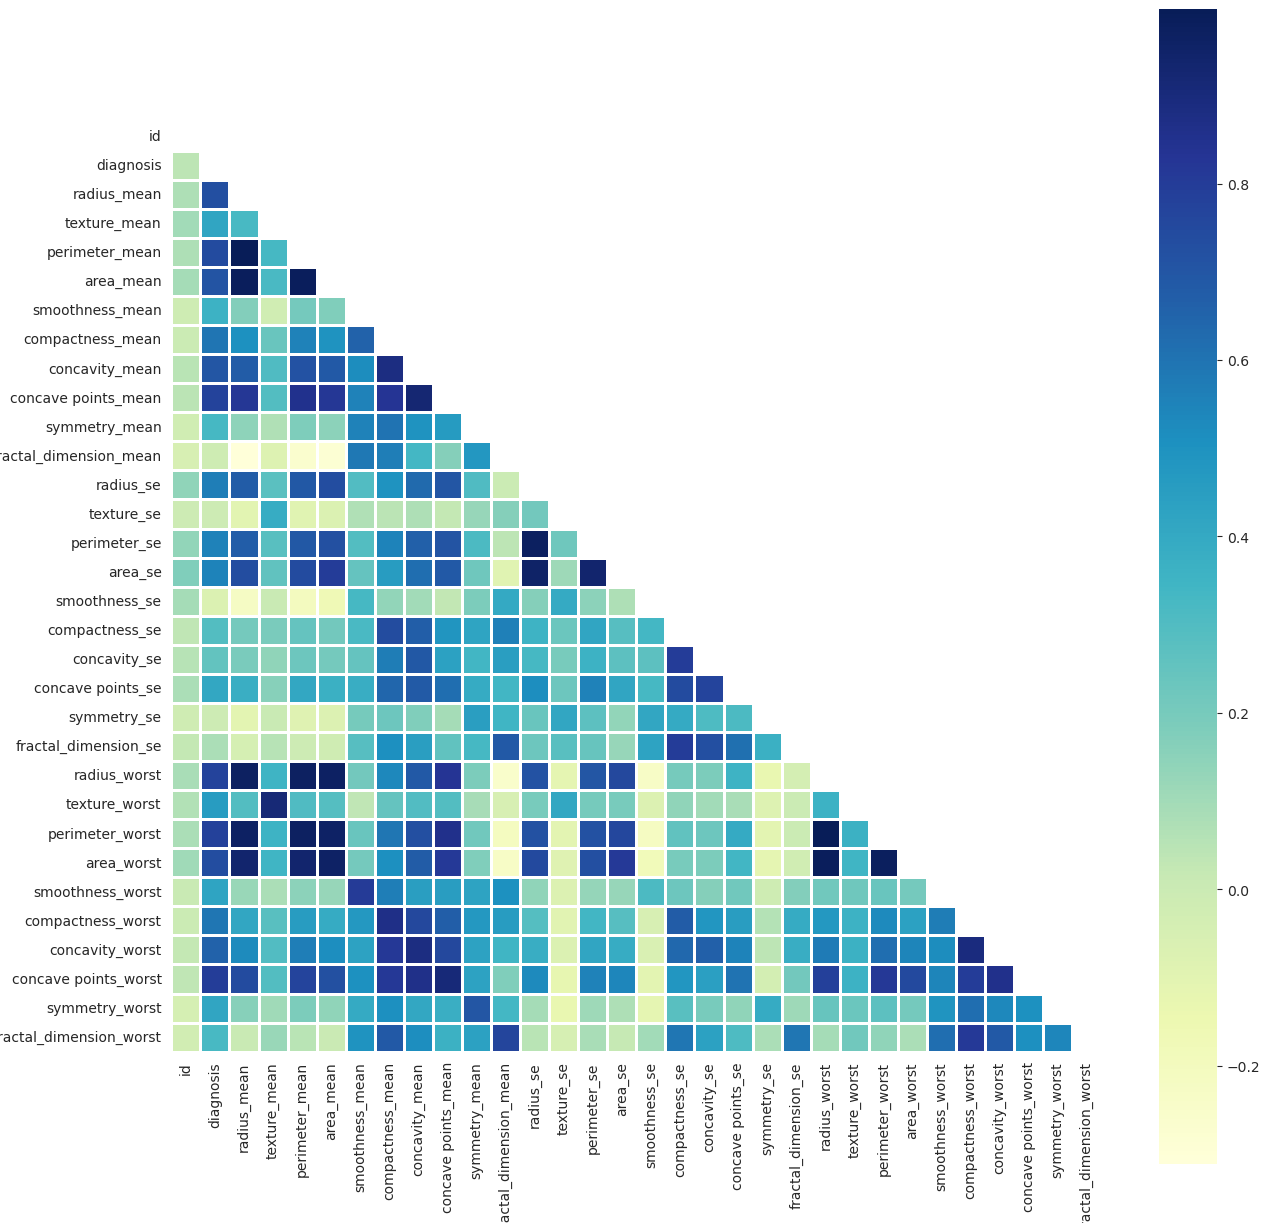

In [23]:
# Wis data corr matrix
corr = df_wis.corr()                                   #Correlation of variables
mask = np.zeros_like(corr)                             #Forcing variables to have a correlation of 0
mask[np.triu_indices_from(mask)] = True                #Upper right triangle portion to have correlation of 0 (mask these cells)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

For the wisconsin breast cancer data set, we can see that diagnosis is moderately and heavily correlated with a variety of varaibles. For example, concave points_worst, radius mean, and concave_points_mean stick out as they have a dark shade of blue. Interestingly, most of our features are positvely correlated with diagnosis, and we don't have many inverse relationships. So as the features increase in magnitude, at first glance, it appears that the diagnosis is more likely. 

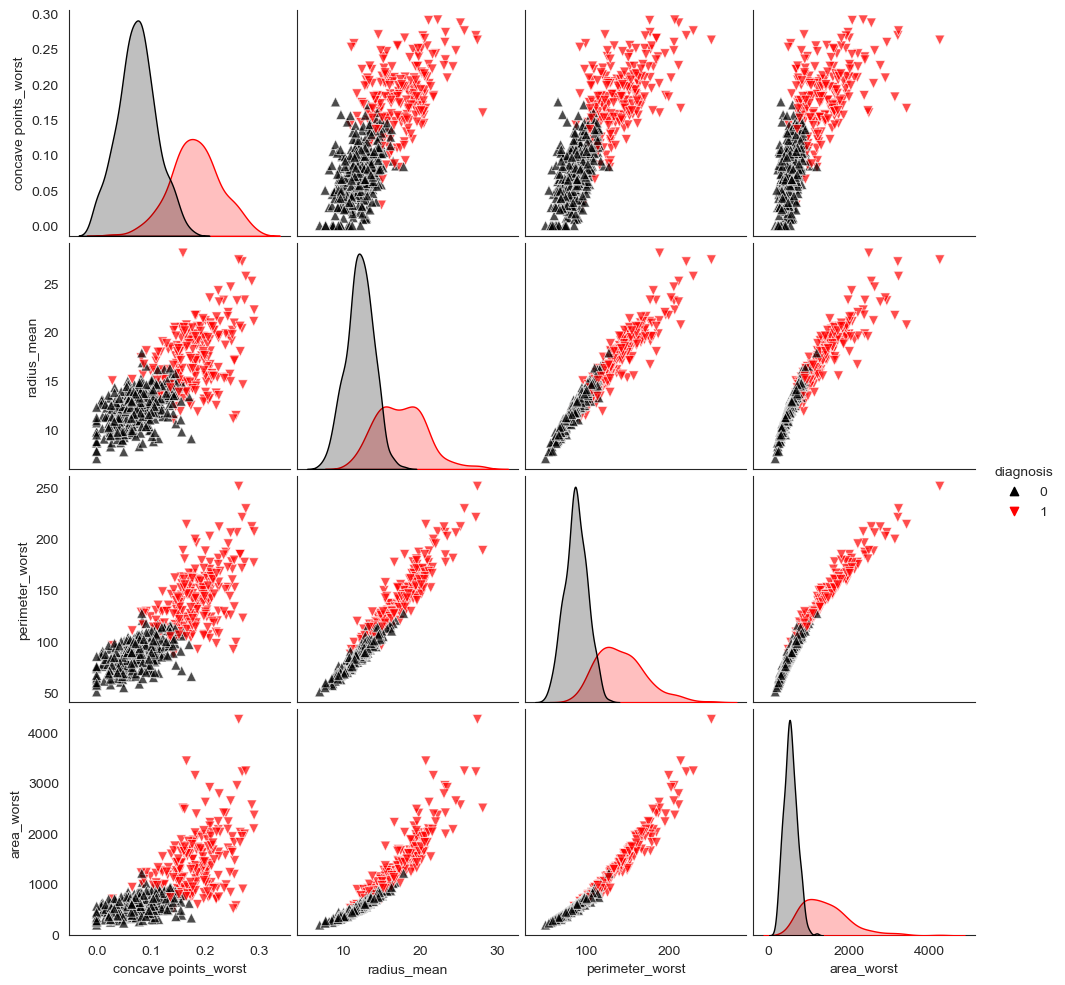

In [68]:
# Pairplot of correlated variables to diagnosis to look at relationship
sns.pairplot(df_wis[['concave points_worst', 'radius_mean', 'perimeter_worst', 'area_worst', 'diagnosis']], hue='diagnosis', palette=["black", "red"],plot_kws=dict(s=50, alpha =0.7),markers=['^','v'])

As you can see here, there is a clear distinction between when a patient has malignant (fast spreading cancer) versus those that have bengin. This can be seen in the correlation graphs where black represents malignant and red represents bengin. We can also see a tighter, more normal distribution with malignant for most of these features where the peak is magnitudes higher than that of those with bengin. 

### BRCA Cancer data

C:\Users\fishe\AppData\Local\Temp\ipykernel_23944\578953144.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_brca.corr()                                   #Correlation of variables


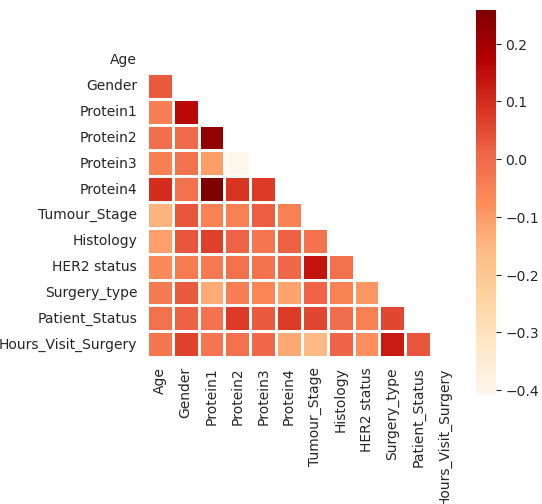

In [25]:
# BRCA data corr matrix
corr = df_brca.corr()                                   #Correlation of variables
mask = np.zeros_like(corr)                            
mask[np.triu_indices_from(mask)] = True                
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="OrRd")

For the BRCA data set, we don't have as many varaibles. Even though both data sets are small, this data set has even fewer entries (half as many), so the correlations we see may not be indicative of the population as a whole. It appears that most variables do not directly effect a patient's status as most of the varaibles are not a dark or light shade. 

Text(13.319444444444445, 0.5, 'Count')

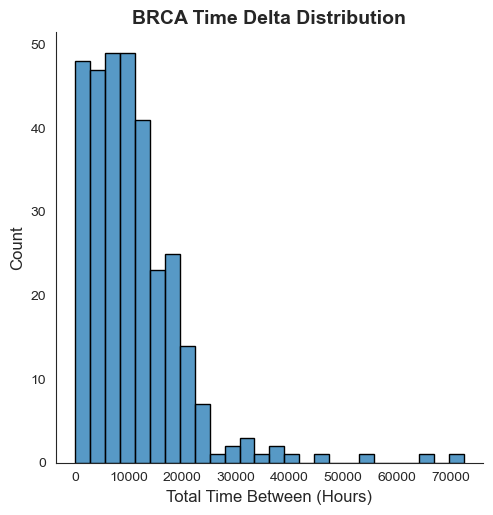

In [28]:
# Distribution of BRCA hours between visit and surgery
sns.displot(df_brca, x="Hours_Visit_Surgery",edgecolor="black")
sns.set_style('white')
plt.title('BRCA Time Delta Distribution', fontsize=14, weight="bold")
plt.xlabel('Total Time Between (Hours)', fontsize=12)
plt.ylabel('Count', fontsize=12)

Most of the patients that had breast cancer had a final appointment fairly close to their surgery (indicated by the right skewed distribution). 

Text(22.29200424382715, 0.5, 'Count')

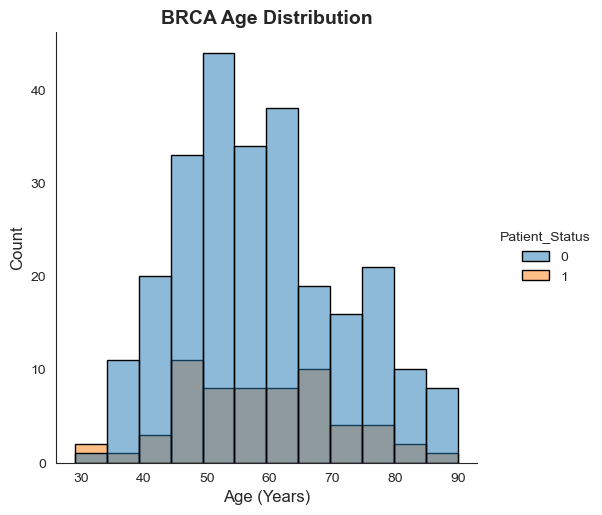

In [73]:
sns.displot(df_brca, x="Age",edgecolor="black",hue= 'Patient_Status')
sns.set_style('white')
plt.title('BRCA Age Distribution', fontsize=14, weight="bold")
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Count', fontsize=12)

Interestingly, it looks the distribution of ages for patients who survived with breast cancer is quite similar to those that did not. 

In [47]:
print('Wisconsin  Patients that have malignant:',round(df_wis[df_wis['diagnosis']==1].shape[0]/df_wis.shape[0],4)*100,'%')
print('BRCA Patients that Died:',round(df_brca[df_brca['Patient_Status']==1].shape[0]/df_brca.shape[0],4)*100,'%')

Wisconsin  Patients that have malignant: 37.26 %
BRCA Patients that Died: 19.56 %


Notice how both of the values we are trying to predict in each data set is the miniority and the split is not close to 50/50. This is why we have to stratify the y variable in the sample to ensure that our machine learning models pick up of the pattern of patients with malignant and patients that have died.